In [1]:

##3 Question: Can we classify the root cause of flight delays (carrier, weather, NAS, security, or late aircraft) based on flight data?
##Model to Use: Decision Tree Classifier 
##Why: Decision Trees are interpretable and work well for multi-class classification tasks. Random Forests provide better performance due to ensembling and can also help identify the most important factors contributing to each type of delay.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("C:/Users/ankit/Downloads/Airline_Delay_Cause.csv")

# Data Preprocessing: Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['carrier'] = label_encoder.fit_transform(df['carrier'])
df['airport'] = label_encoder.fit_transform(df['airport'])

# Fill any missing values with zero
df.fillna(0, inplace=True)


In [2]:
# Define features (X) and target (y)
features = ['month', 'carrier', 'airport', 'arr_flights', 'arr_cancelled', 
            'arr_delay', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = df[features]
y = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].idxmax(axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9801974826388888
Classification Report:
                  precision    recall  f1-score   support

      carrier_ct       0.99      0.99      0.99      9792
late_aircraft_ct       0.97      0.97      0.97      4478
          nas_ct       0.98      0.98      0.98      3938
     security_ct       0.25      1.00      0.40         1
      weather_ct       0.94      0.86      0.90       223

        accuracy                           0.98     18432
       macro avg       0.83      0.96      0.85     18432
    weighted avg       0.98      0.98      0.98     18432



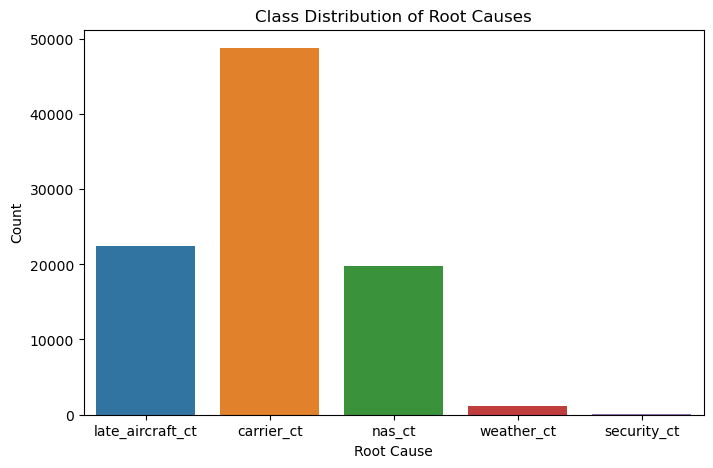

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(y)
plt.title("Class Distribution of Root Causes")
plt.xlabel("Root Cause")
plt.ylabel("Count")
plt.show()


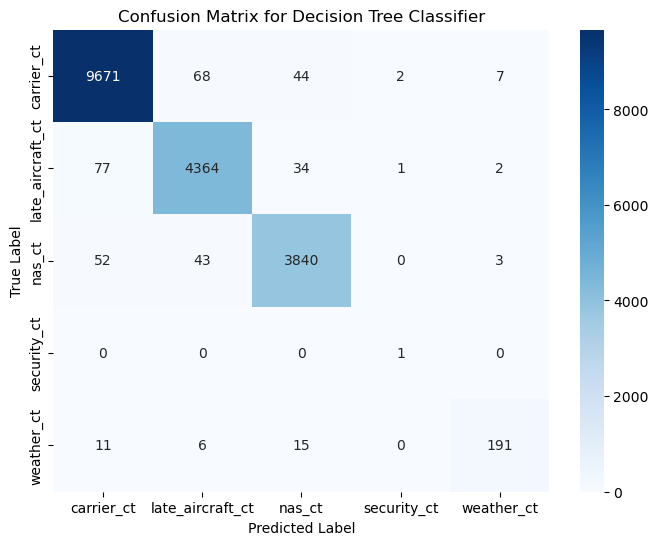

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
